<a href="https://colab.research.google.com/github/yankikalfa/SAIS-ML-for-Finance/blob/main/In_Class_Assignment_Tree_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In Class Assignment: Tree Based Methods
## Instructions:
1. Download necessary libraries
2. Download Goyal Welch Dataset
3. Forecast the last 12 months of data
  * Do not forget to lag the feature space
  * Create a validation set of 12 months
  * Tune the Hyperparameters 
  * Forecast the last 12 months
4. Show feature importance graphs
5. Plot forecasts against the actual

## Hyperparameters:
### Decision Trees:
* Max Depth : [5,10,20,30]
* Min Samples Split: [5,10,50,100,200]
* Min Sample Leaf: [1,5,10,100,200] 
* Complexity Cost Pruning : $\alpha=[0,0.0001,0.001,0.01,0.1,1]$

### Random Forest:
* Criterion: Mean Squared Error
* Number of parallel trees: [100,300,500]
* Max Depth: [5,10,20]
* Min Samples Split: [5,10,50,100]
* Min Sample Leaf: [1,10,100]
* Max features at nodes: [sqrt, 0.3] 

### Boosted Trees (This takes a while)
* Criterion: Mean Squared Error
* Loss: Mean Squared Error
* Number of sequential trees: [500,1000]
* Max Depth: [1,3,5]
* Min Samples Split: [5,10,100]
* Min Sample Leaf: [1,10,100]
* Max features at nodes: [sqrt, 0.3] 
* Learning Rate: $\lambda \in \{0.001,0.01\}$



## Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (16,8)

In [ ]:
df = None
df['yyyymm'] = None
df.set_index(None)
df['er'] = None
df.drop([None],axis=1,inplace=True)
Y = None
X = None

In [ ]:
df.head()

### Training, Validation, Test

In [ ]:
X_train = None

In [ ]:
X_val = None

In [ ]:
X_test = None


In [ ]:
X_train_full = None

In [ ]:
y_train = None

In [ ]:
y_val=None
len(y_val)

In [ ]:
y_test=None

In [ ]:
y_train_full= None

## Decision Trees

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Manual Hyperparameter Search

In [ ]:
depth=[]
splits=[]
leaves=[]
alpha=[]
mse=[]
# Write a loop that will search the parameter space

In [ ]:
validation_results = None

In [ ]:
validation_results.sort_values(by='mse')

In [ ]:
validation_results.loc[validation_results['mse']==min(validation_results['mse'])]

In [ ]:
tree_tune = None
tree_fit=tree_tune.fit(X_train_full,y_train_full)
tree_predict = pd.Series(tree_fit.predict(X_test)).reset_index(drop=True).rename('f_tree_tuned')



In [ ]:
actual = pd.Series(y_test).reset_index(drop=True).rename('Actual')

In [ ]:
forecasts=pd.concat([actual,tree_predict],axis=1)
forecasts.plot()

The "Tuned" tree has a much better fit

## Random Forests

### Manual Hyperparameter Search for Random Forest

In [ ]:
n_tree=[]
depth=[]
splits=[]
leaves=[]
n_feature=[]
mse=[]
# Write a loop that will search the parameter space


In [ ]:
validation_results = None

In [ ]:
validation_results.sort_values(by='mse')

In [ ]:
validation_results.loc[validation_results['mse']==min(validation_results['mse'])]

In [ ]:
rf_tune =None # Fit the Random Forest with the best parameters
rf_fit=rf_tune.fit(X_train_full,y_train_full)
rf_predict = pd.Series(rf_fit.predict(X_test)).reset_index(drop=True).rename('f_rf_tuned')

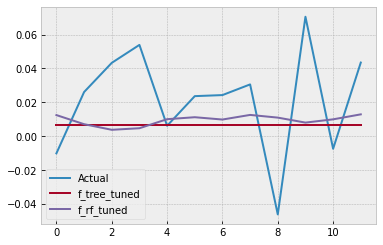

In [ ]:
forecasts=pd.concat([forecasts,rf_predict],axis=1)
forecasts.plot()

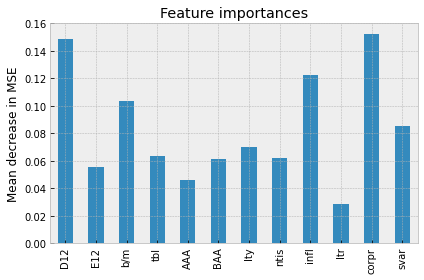

In [ ]:
import pandas as pd
importances= rf_fit.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in MSE")
fig.tight_layout()

## Boosted Trees

### Manual Search

In [ ]:
n_tree=[]
depth=[]
splits=[]
leaves=[]
n_feature=[]
learn=[]
mse=[]
# Write a loop that will search the parameter space

In [ ]:
validation_results = None

In [ ]:
validation_results.loc[validation_results['mse']==min(validation_results['mse'])]

In [ ]:
bt_tune = None # Fit the boosted trees with the best parameters
bt_fit=bt_tune.fit(X_train_full,y_train_full)
bt_predict = pd.Series(bt_fit.predict(X_test)).reset_index(drop=True).rename('f_bt_tuned')

In [ ]:
forecasts=pd.concat([forecasts,bt_predict],axis=1)

In [ ]:
forecasts

In [ ]:
forecasts['e_tree']= forecasts['Actual']-forecasts['f_tree_tuned']
forecasts['e_rf']= forecasts['Actual']-forecasts['f_rf_tuned']
forecasts['e_bt']= forecasts['Actual']-forecasts['f_bt_tuned']

In [ ]:
forecasts.set_index(df.loc['2021'].index.copy(),inplace=True)

In [ ]:
plt.plot(forecasts['Actual'],label='Actual')
plt.plot(forecasts['f_tree_tuned'],label='Tree')
plt.plot(forecasts['f_rf_tuned'],label='Random Forest')
plt.plot(forecasts['f_bt_tuned'],label='Boosted Trees')
plt.title('Forecast Comparison')
plt.legend()



In [ ]:
plt.plot(forecasts['e_tree'],label='Tree')
plt.plot(forecasts['e_rf'],label='Random Forest')
plt.plot(forecasts['e_bt'],label='Boosted Trees')
plt.title('Forecast Error Comparison')
plt.legend()

## MSE Comparison

In [ ]:
round(mean_squared_error(forecasts['Actual'],forecasts['f_tree_tuned']),4)


In [ ]:
round(mean_squared_error(forecasts['Actual'],forecasts['f_rf_tuned']),4)

In [ ]:
round(mean_squared_error(forecasts['Actual'],forecasts['f_bt_tuned']),4)

#Which model is best according to MSE?
# Write your answer here